In [13]:
pwd

'/home/wsuser/work'

In [14]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_80a50b9236004abd9036805ab1cc833a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7NomblaLw00e_mgDRvtL70fzh5D2R7p70TxRorD4mO-h',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_80a50b9236004abd9036805ab1cc833a.get_object(Bucket='cnnfertilizersrecommendationsyste-donotdelete-pr-6xksgmcrwwbfcj', Key='Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


# Unzip the Dataset folder

In [15]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [16]:
ls


'Dataset Plant Disease'/   Vegetable.h5


In [17]:
pwd

'/home/wsuser/work'

# Image Augmentation/Image Preprocessing

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset
we make use of Keras ImageDataGenerator  class for image preprocessing.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)

In [20]:
test_datagen=ImageDataGenerator(rescale=1)

In [21]:
pwd

'/home/wsuser/work'

In [22]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/train", target_size = (128,128),class_mode='categorical', batch_size=32)

Found 5384 images belonging to 6 classes.


In [23]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [24]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test", target_size = (128,128),class_mode='categorical', batch_size=32)

Found 1686 images belonging to 6 classes.


In [25]:
x_test.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

# CNN-Model Building For Fruit Disease Prediction
We are ready with the augmented and pre-processed image data, Lets begin our model building, this activity includes the following steps

•	Import the model building Libraries

•	Initializing the model

•	Adding CNN Layers

•	Adding Hidden Layer

•	Adding Output Layer

•	Configure the Learning Process

•	Training and testing the model

•	Saving the model


## Import Required Libararies

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

###  Initializing The Model

In [27]:
model=Sequential()

### ADD CNNLayers

We will be adding three layers for CNN

•	Convolution layer

•	Pooling layer

•	Flattening layer


In [28]:
#Adding Convolution layer
model.add(Convolution2D(32, (3,3), input_shape=(128,128,3), activation='relu'))

In [29]:
# adding Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [30]:
#adding Flattening layer
model.add(Flatten())

In [31]:
#summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


## Adding Ouput Layer 

This step is to add a dense layer (output layer) where you will be specifying the number of classes your dependent variable has, activation function, and weight initializer as the arguments.

We use the add () method to add dense layers

the output dimensions here is 6

In [32]:
# adding Hidden Layers
# model.add(Dense(output_dim=40, init='uniform', activation='relu'))
# model.add(Dense(output_dim=20, init='random_uniform', activation='relu'))
# model.add(Dense(output_dim=6, activation='softmax',  init='random_uniform'))
model.add(Dense(40,  activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Train And Save The Model

## Compile the model

After adding all the required layers, the model is to be compiled. For this step, loss function, optimizer and metrics for evaluation can be passed as arguments.

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit and Save model

Fit the neural network model with the train and test set, number of epochs and validation steps.

Steps per epoch is determined by number of training images//batch size, for validation steps number of validation images//batch size.

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Length of training Data
len(x_train)

169

In [36]:
# Length of testing Data
len(x_test)

53

In [37]:
model.fit_generator(x_train,steps_per_epoch=168, validation_data=x_test, validation_steps=53, epochs=3)

/tmp/wsuser/ipykernel_165/3094961276.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=168, validation_data=x_test, validation_steps=53, epochs=3)


Epoch 1/3
168/168 [==============================] - 94s 556ms/step - loss: 1.0965 - accuracy: 0.6444 - val_loss: 69.9831 - val_accuracy: 0.7782
Epoch 2/3
168/168 [==============================] - 95s 562ms/step - loss: 0.4178 - accuracy: 0.8507 - val_loss: 196.9055 - val_accuracy: 0.6886
Epoch 3/3
168/168 [==============================] - 92s 546ms/step - loss: 0.3441 - accuracy: 0.8802 - val_loss: 110.4203 - val_accuracy: 0.7728


# Test Both The Models
Now that we have trained both the models' let's test both the models by loading the saved models. let's create another notebook for testing


### Test The Model
The model is to be tested with different images to know if it is working correctly.
Import the packages and load the saved model


In [38]:
# Import the required libraries
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array


## Save Model

In [39]:
model.save('fruit.h5')

In [40]:
## load model

model=load_model('fruit.h5')

In [41]:
#img=image.load_img(r"/home/wsuser/work/dataset/Testing/elephants/images (43).jpeg")

In [42]:
pwd

'/home/wsuser/work'

In [43]:
img=image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/0c55b379-c6e7-4b89-959f-abc506fed437___RS_HL 5927.JPG", target_size = (128,128))

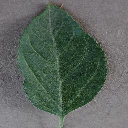

In [44]:
img

In [45]:
x=image.img_to_array(img)
x

array([[[118., 113., 117.],
        [113., 108., 112.],
        [112., 107., 111.],
        ...,
        [125., 120., 124.],
        [124., 119., 123.],
        [127., 122., 126.]],

       [[117., 112., 116.],
        [120., 115., 119.],
        [117., 112., 116.],
        ...,
        [129., 124., 128.],
        [122., 117., 121.],
        [125., 120., 124.]],

       [[118., 113., 117.],
        [115., 110., 114.],
        [117., 112., 116.],
        ...,
        [123., 118., 122.],
        [126., 121., 125.],
        [127., 122., 126.]],

       ...,

       [[141., 140., 145.],
        [149., 148., 153.],
        [150., 149., 154.],
        ...,
        [137., 132., 136.],
        [138., 133., 137.],
        [134., 129., 133.]],

       [[119., 118., 123.],
        [131., 130., 135.],
        [141., 140., 145.],
        ...,
        [137., 132., 136.],
        [140., 135., 139.],
        [137., 132., 136.]],

       [[143., 142., 147.],
        [140., 139., 144.],
        [139., 1

In [46]:
x=np.expand_dims(x, axis=0)
x

array([[[[118., 113., 117.],
         [113., 108., 112.],
         [112., 107., 111.],
         ...,
         [125., 120., 124.],
         [124., 119., 123.],
         [127., 122., 126.]],

        [[117., 112., 116.],
         [120., 115., 119.],
         [117., 112., 116.],
         ...,
         [129., 124., 128.],
         [122., 117., 121.],
         [125., 120., 124.]],

        [[118., 113., 117.],
         [115., 110., 114.],
         [117., 112., 116.],
         ...,
         [123., 118., 122.],
         [126., 121., 125.],
         [127., 122., 126.]],

        ...,

        [[141., 140., 145.],
         [149., 148., 153.],
         [150., 149., 154.],
         ...,
         [137., 132., 136.],
         [138., 133., 137.],
         [134., 129., 133.]],

        [[119., 118., 123.],
         [131., 130., 135.],
         [141., 140., 145.],
         ...,
         [137., 132., 136.],
         [140., 135., 139.],
         [137., 132., 136.]],

        [[143., 142., 147.],
       

In [47]:
y=np.argmax(model.predict(x), axis=1)
y

array([1])

In [48]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [49]:
index=['Apple___Black_rot','Apple___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Peach___Bacterial_spot','Peach___healthy']

In [50]:
index[y[0]]

'Apple___healthy'

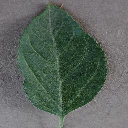

In [51]:
img

# IBM Deployment

In [53]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 16.8 MB/s eta 0:00:01


In [54]:
from ibm_watson_machine_learning import APIClient

In [85]:
wml_credentials={
    "url":"https://jp-tok.ml.cloud.ibm.com",
    "apikey":"CUJ2_OrnputDtDNE89DI1jwSiMsSen-6tzJAhRUwiDeT"
    
}

In [86]:
Client=APIClient(wml_credentials)

In [87]:
Client 

In [88]:
def guid_space_name(Client, FRS_Deploy):
    space=Client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name']==FRS_Deploy)['metadata']['id'])

In [89]:
space_ui=guid_space_name(Client,'FRS_Deploy')
print(space_ui)

e3ba9685-b85b-4c8e-8f84-6c72f8f19ba0


In [90]:
 Client.set.default_space(space_ui)

'SUCCESS'

In [91]:
Client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [92]:
software_space_uid=Client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9' )

In [93]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [94]:
ls

'Dataset Plant Disease'/            FRS-Vegetable-Disease-Prediction.tgz
 FRS-Fruit                          FRS-Vegetable.tar.gb
 FRS-Fruit-Disease-Prediction.tgz   fruit.h5
 FRS-Fruit.tar.gb                   Vegetable.h5


In [95]:
!tar -zcvf FRS-Fruit-Disease-Prediction.tgz fruit.h5

fruit.h5


In [96]:
ls

'Dataset Plant Disease'/            FRS-Vegetable-Disease-Prediction.tgz
 FRS-Fruit                          FRS-Vegetable.tar.gb
 FRS-Fruit-Disease-Prediction.tgz   fruit.h5
 FRS-Fruit.tar.gb                   Vegetable.h5


In [97]:
model_details=Client.repository.store_model(model='FRS-Fruit-Disease-Prediction.tgz', 
meta_props={
              Client.repository.ModelMetaNames.NAME:"Fruit CNN Model Building",
              Client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
              Client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid 
    })

In [98]:
model_id=Client.repository.get_model_id(model_details)

In [99]:
model_id

'19c35527-da29-4aea-bd59-e4ecea4c336f'

In [102]:
Client.repository.download(model_id, 'FRS-Fruit1.tar.gb')

Successfully saved model content to file: 'FRS-Fruit1.tar.gb'


'/home/wsuser/work/FRS-Fruit1.tar.gb'

In [103]:
ls

'Dataset Plant Disease'/            FRS-Vegetable-Disease-Prediction.tgz
 FRS-Fruit                          FRS-Vegetable.tar.gb
 FRS-Fruit1.tar.gb                  fruit.h5
 FRS-Fruit-Disease-Prediction.tgz   Vegetable.h5
 FRS-Fruit.tar.gb
